In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
mat = loadmat('Data/ex8data1.mat')
X = mat['X']

In [24]:
def plot_scatter(X):
    plt.figure(figsize=(8, 6))
    plt.plot(X[:, 0], X[:, 1], 'bx', mew=0.8, ms=5)
    plt.xlabel('Throughput (mb/s)')
    plt.ylabel('Latency (ms)')
    plt.xlim(0, 30)
    plt.ylim(0, 30)

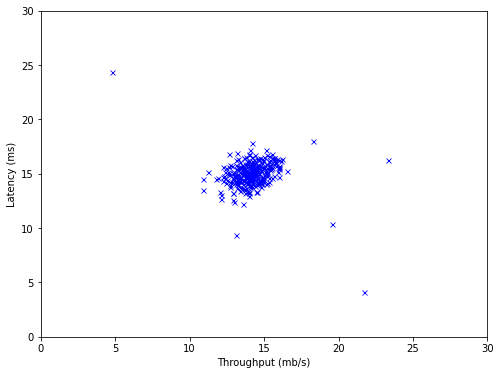

In [25]:
plot_scatter(X)

In [26]:
def estimate_gaussian(X):
    
    mu = np.mean(X, axis=0)
    cov = np.cov(X.T)
    
    return mu, cov

In [27]:
mu, cov = estimate_gaussian(X)

In [28]:
from scipy.stats import multivariate_normal

In [29]:
rv = multivariate_normal(mu, cov)

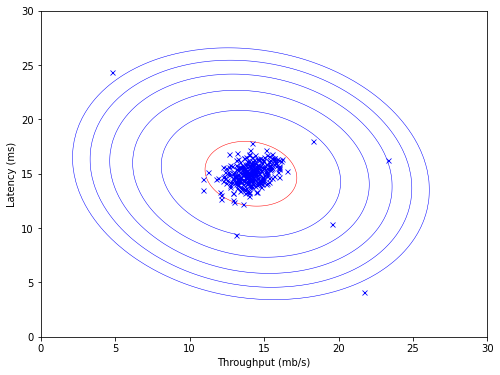

In [44]:
x, y = np.mgrid[0:30:0.1, 0:30:.1]
pos = np.dstack((x, y))

plot_scatter(X)

cont_loc = np.geomspace(10**(-18), 10, 7)
plt.contour(x, y, rv.pdf(pos), cont_loc, linewidths=0.5, 
            colors=['b']*5+['r'])
plt.show()

In [37]:
p = rv.pdf(X)
anomalies = X[p < 0.001]

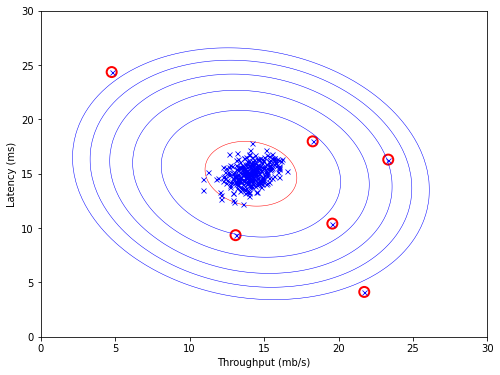

In [47]:
plot_scatter(X)
plt.contour(x, y, rv.pdf(pos), cont_loc, linewidths=0.5, 
            colors=['b']*5+['r'])
plt.scatter(*anomalies.T, s=100, linewidths=2,
            facecolors='none', edgecolors='r')
plt.show()

In [48]:
def select_threshold(y_val, p_val):
    pass